In [1]:
import sensor_imputation_thesis.shared.load_data as load 
from data_insight import setup_duckdb
from duckdb import DuckDBPyConnection as DuckDB
import pandas as pd
from duckdb import DuckDBPyRelation as Relation
from pathlib import Path
import hashlib

### Prep and Fetch Data

In [24]:
#if needed
import sys
sys.path.append('/home/ec2-user/SageMaker/sensor-imputation-thesis')

In [8]:
tags=["te_exh_cyl_out",
      "pd_air_ic",
      "pr_exh_turb_out",
      "te_air_ic_out",
      "te_seawater",
      "te_air_comp_in_a",
      "fr_tc",
      "pr_baro",
      "te_air_comp_in_a",
      "te_exh_turb_in",
      "te_exh_turb_out",
      "te_air_svac_rec", #not included in available tags
      "pr_exh_rec",
      "fr_tc",
      "pr_air_svac", #not included in available tags
      "pr_air_svac_ecs",
      "re_gov_exh_turb_out",
      "te_exh_turb_out",
      "re_egb_btv1_pos_setpoint", #not found
      "fr_pvu_ext_pump", #not found
      "fr_eng_setpoint",
      "te_air_ic_out",
      "te_pvu_hydoil_a",#not found
      "pd_air_ic",
      "pd_pvu_hp_filter", #not found
      "pr_cyl_max"
    
      ]

In [2]:
pd.set_option('display.max_columns', None)

def load_engine_data(
    con: DuckDB, product_id: str, start: pd.Timestamp, stop: pd.Timestamp, tags: list[str]
) -> Relation:
    return con.sql(f"""
    SELECT {','.join(tags)}
    FROM timeseries
    WHERE
        time BETWEEN '{start}' AND '{stop}'
        AND pid = '{product_id}'
    """)

def get_tags_hash(tags):
    return hashlib.md5(','.join(tags).encode()).hexdigest()

start, stop = pd.Timestamp("2023-10-01"), pd.Timestamp("2024-10-01")

tags = [
        "time",
        "fr_eng",
        "te_exh_cyl_out__0",
        "te_exh_cyl_out__1",
        "te_exh_cyl_out__2",
        "te_exh_cyl_out__3",
        "te_exh_cyl_out__4",
        "te_exh_cyl_out__5",
        "te_exh_cyl_out__6",
        "pd_air_ic__0",
        "pr_exh_turb_out__0",
        "pr_exh_turb_out__1",
        "pr_exh_turb_out__2",
        "pr_exh_turb_out__3",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "te_seawater",
        "te_air_comp_in_a__0",
        "te_air_comp_in_a__1",
        "te_air_comp_in_a__2",
        "te_air_comp_in_a__3",
        "fr_tc__0",
        "fr_tc__1",
        "fr_tc__2",
        "fr_tc__3",
        "pr_baro",
        "te_exh_turb_in__0",
        "te_exh_turb_in__1",
        "te_exh_turb_in__2",
        "te_exh_turb_in__3",
        "te_exh_turb_out__0",
        "te_exh_turb_out__1",
        "te_exh_turb_out__2",
        "te_exh_turb_out__3",
        "pr_exh_rec",
        "pr_air_scav",
        "pr_air_scav_ecs",
        "fr_eng_setpoint",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "pd_air_ic__0",
        "pd_air_ic__1",
        "pd_air_ic__2",
        "pd_air_ic__3",
        "pr_cyl_max__0",
        "pr_cyl_max__1",
        "pr_cyl_max__2",
        "pr_cyl_max__3",
        "pr_cyl_max__4",
        "pr_cyl_max__5",
        "pr_cyl_max__6",
        "pr_cyl_max__7",
        "pr_cyl_max__8",
        "pr_cyl_max__9",
        "pr_cyl_max__10",
        "pr_cyl_max__11"
        ]
product_id = "89ccb7a888d53f8792f0580801cede9a"

cache = Path(f'/tmp/data_{get_tags_hash(tags)}.parquet')
if cache.exists():
    df = pd.read_parquet(cache)
else:
    con = setup_duckdb()
    df = load_engine_data(con, product_id, start, stop, tags).df()
    df.to_parquet(cache)

print(df.head(10))

                 time  fr_eng  te_exh_cyl_out__0  te_exh_cyl_out__1  \
0 2023-10-01 00:00:00     0.0             400.15             402.15   
1 2023-10-01 00:01:00     0.0             399.15             402.15   
2 2023-10-01 00:02:00     0.0             399.15             401.15   
3 2023-10-01 00:03:00     0.0             399.15             401.15   
4 2023-10-01 00:04:00     0.0             399.15             401.15   
5 2023-10-01 00:05:00     0.0             399.15             401.15   
6 2023-10-01 00:06:00     0.0             399.15             401.15   
7 2023-10-01 00:07:00     0.0             399.15             400.15   
8 2023-10-01 00:08:00     0.0             399.15             400.15   
9 2023-10-01 00:09:00     0.0             399.15             400.15   

   te_exh_cyl_out__2  te_exh_cyl_out__3  te_exh_cyl_out__4  te_exh_cyl_out__5  \
0             397.15             399.15             398.15             401.15   
1             397.15             398.15             398.

In [3]:
df.describe

<bound method NDFrame.describe of                       time    fr_eng  te_exh_cyl_out__0  te_exh_cyl_out__1  \
0      2023-10-01 00:00:00  0.000000             400.15             402.15   
1      2023-10-01 00:01:00  0.000000             399.15             402.15   
2      2023-10-01 00:02:00  0.000000             399.15             401.15   
3      2023-10-01 00:03:00  0.000000             399.15             401.15   
4      2023-10-01 00:04:00  0.000000             399.15             401.15   
...                    ...       ...                ...                ...   
439181 2024-07-31 23:55:00  1.026240             555.15             544.15   
439182 2024-07-31 23:56:00  1.035701             555.15             544.15   
439183 2024-07-31 23:57:00  1.028137             555.15             544.15   
439184 2024-07-31 23:58:00  1.027765             555.15             544.15   
439185 2024-07-31 23:59:00  1.021612             555.15             544.15   

        te_exh_cyl_out__2  te

In [3]:
#drop columns with all nan values 
df1=df.dropna(axis=1,how="all")

In [30]:
df1.columns

Index(['time', 'fr_eng', 'te_exh_cyl_out__0', 'te_exh_cyl_out__1',
       'te_exh_cyl_out__2', 'te_exh_cyl_out__3', 'te_exh_cyl_out__4',
       'te_exh_cyl_out__5', 'te_exh_cyl_out__6', 'pd_air_ic__0',
       'te_air_ic_out__0', 'te_air_ic_out__1', 'te_air_ic_out__2',
       'te_seawater', 'pr_baro', 'pr_exh_rec', 'pr_air_scav',
       'pr_air_scav_ecs', 'fr_eng_setpoint', 'te_air_ic_out__0_1',
       'te_air_ic_out__1_1', 'te_air_ic_out__2_1', 'pd_air_ic__0_1',
       'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0', 'pr_cyl_max__1',
       'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4', 'pr_cyl_max__5',
       'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8', 'pr_cyl_max__9',
       'pr_cyl_max__10'],
      dtype='object')

### check data(columns) distribution

/tmp/ipykernel_7162/634597506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time'] = pd.to_datetime(df1['time'])


KeyboardInterrupt: 

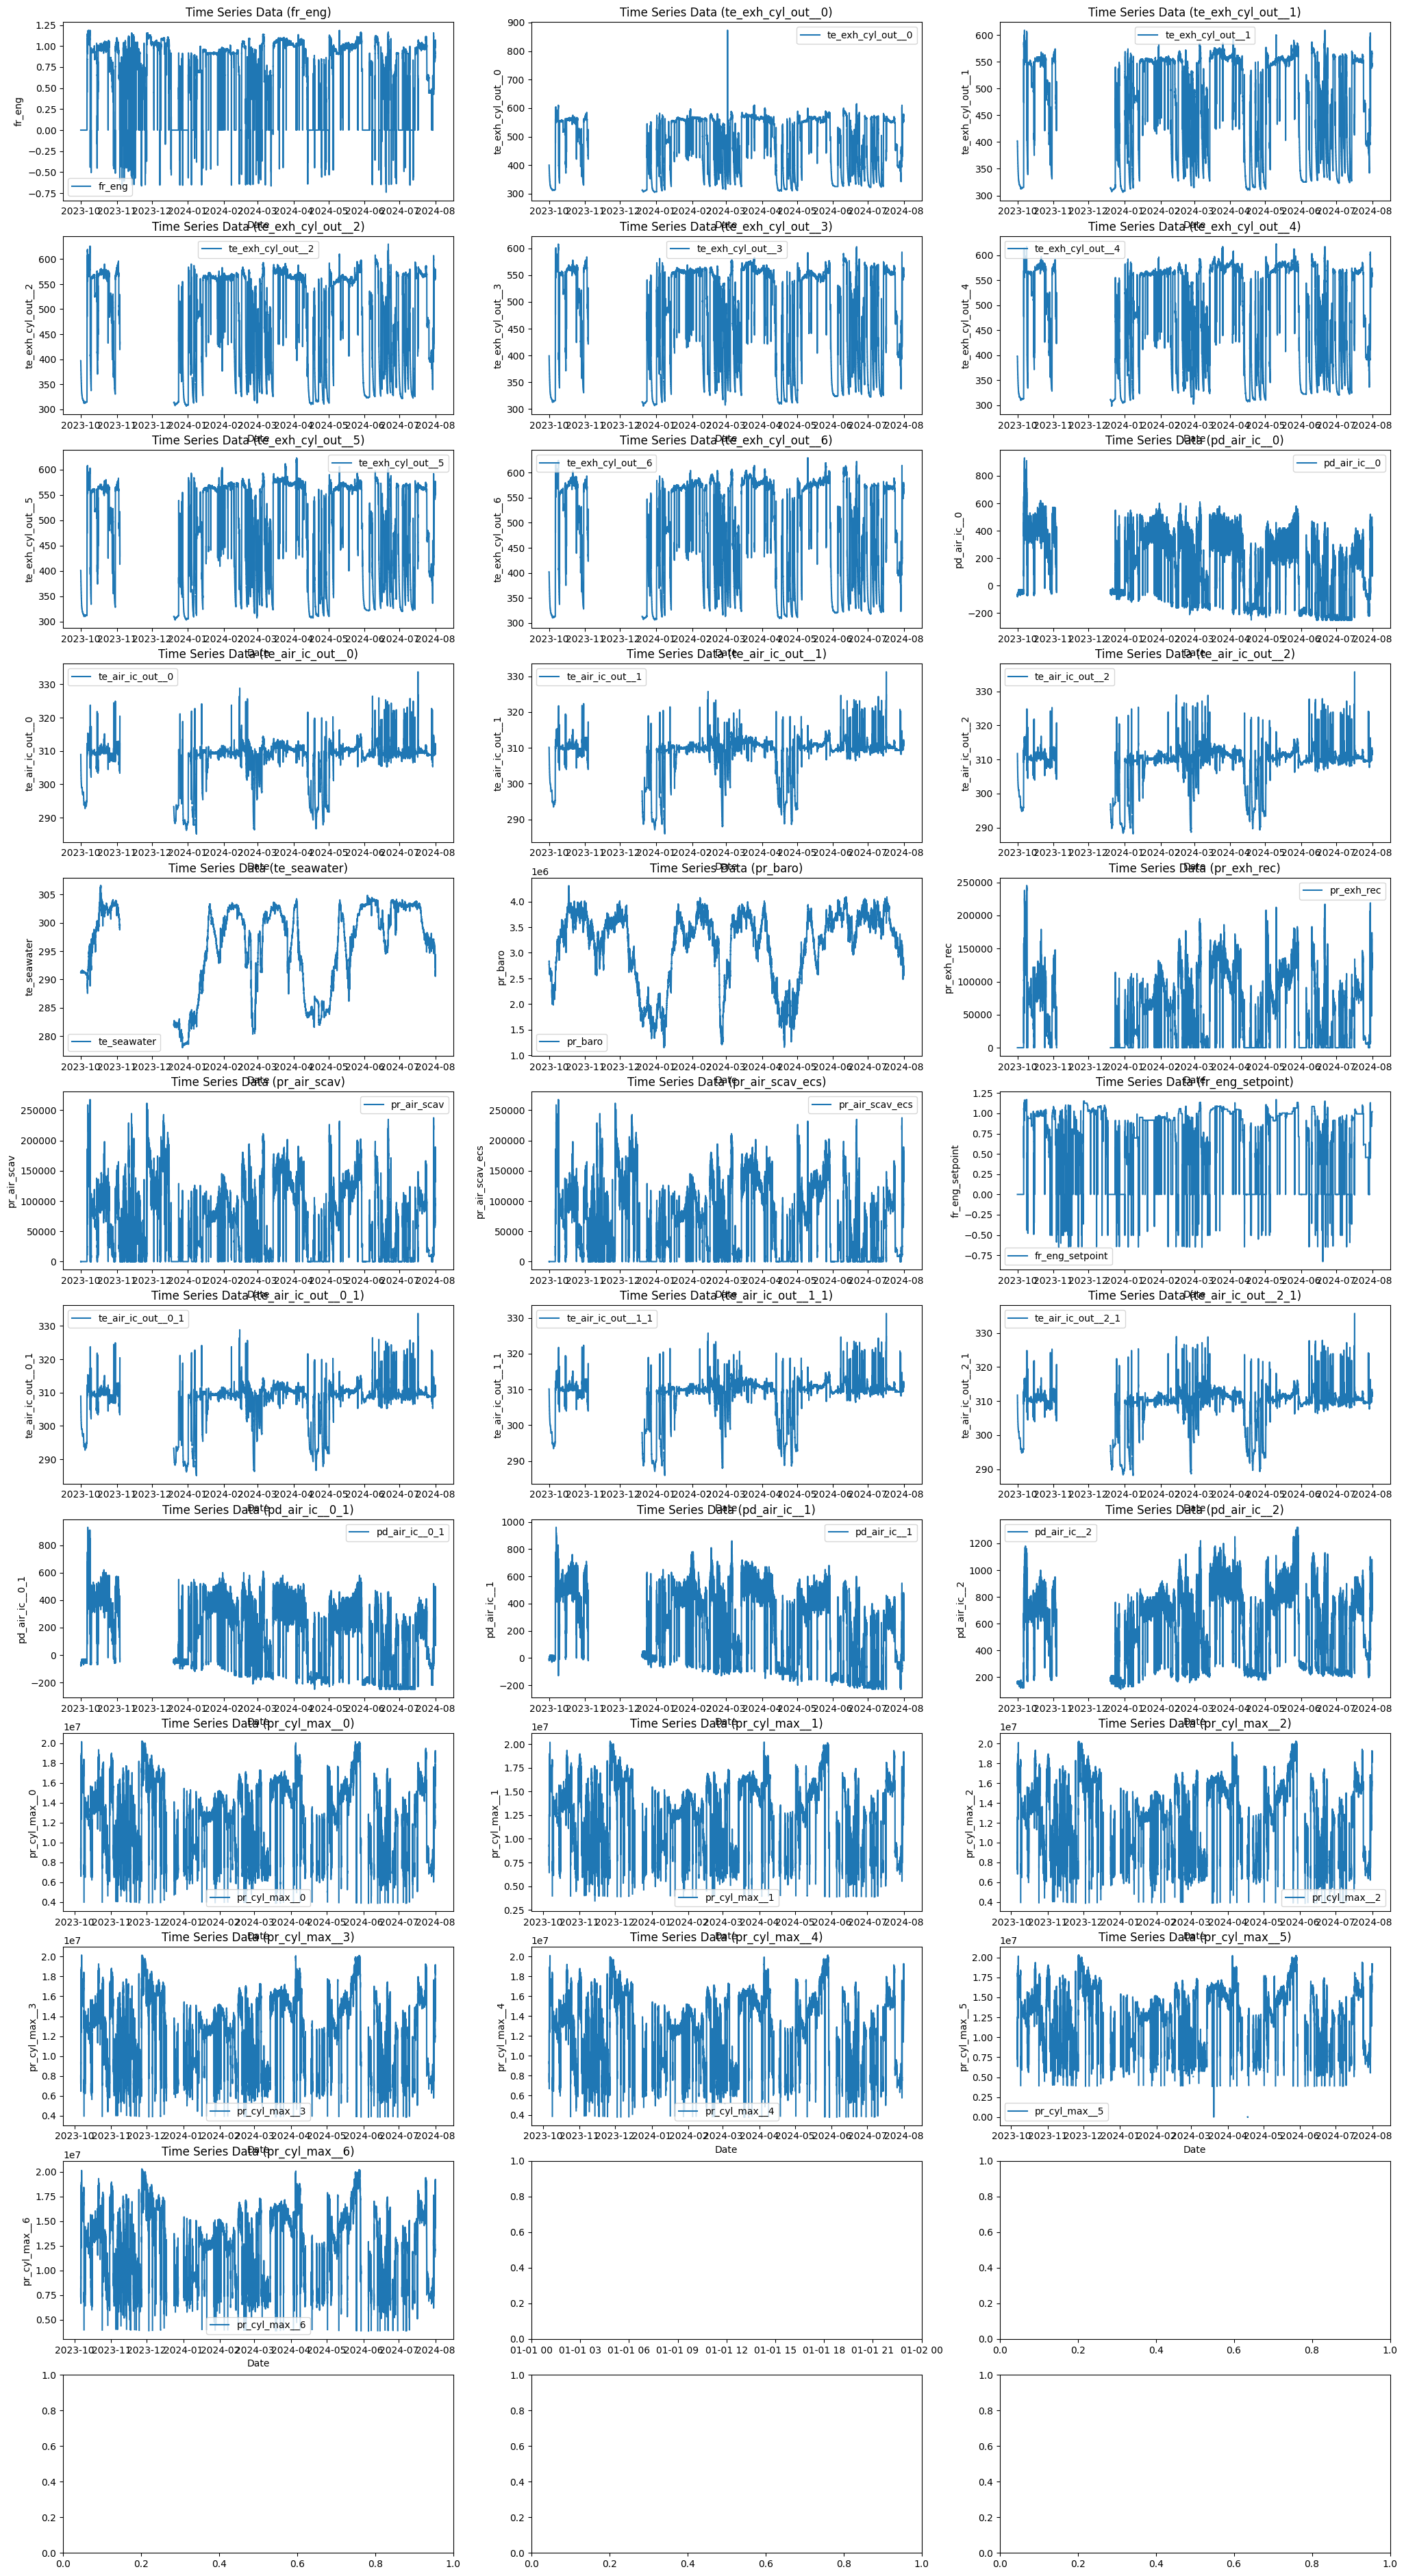

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure the date column is parsed correctly 
df1.loc[:, 'time'] = pd.to_datetime(df1['time'])
#get the column counts 
num_columns = len(df1.columns)
# Calculate the number of rows and columns for the subplot grid
num_rows = (num_columns + 2) // 3 
# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(25, num_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through the columns and create individual plots
for i, column in enumerate(df1.columns):
    axes[i].plot(df1[column], label=f"{column}")
    axes[i].set_title(f"Time Series Data ({column})")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(f"{column}")
    axes[i].legend()
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


### Check Engine Running and Filter Dataset 

In [4]:
# Based on Engine Speed higher than 0 criteria
df2=df1[df1["fr_eng"]>0]

In [5]:
len(df2)

301362

pr_air_svac & pr_air_svac_ecs have the same values 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#get the column counts 
num_columns = len(df2.columns)
# Calculate the number of rows and columns for the subplot grid
num_rows = (num_columns + 2) // 3 
# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(25, num_rows * 4))
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Loop through the columns and create individual plots
for i, column in enumerate(df2.columns):
    axes[i].plot(df1[column], label=f"{column}")
    axes[i].set_title(f"Time Series Data ({column})")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel(f"{column}")
    axes[i].legend()
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


### Models

In [10]:
from sklearn.pipeline import Pipeline 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector as selector
import mlflow
import mlflow.sklearn
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df2.columns

Index(['time', 'fr_eng', 'te_exh_cyl_out__0', 'te_exh_cyl_out__1',
       'te_exh_cyl_out__2', 'te_exh_cyl_out__3', 'te_exh_cyl_out__4',
       'te_exh_cyl_out__5', 'te_exh_cyl_out__6', 'pd_air_ic__0',
       'te_air_ic_out__0', 'te_air_ic_out__1', 'te_air_ic_out__2',
       'te_seawater', 'pr_baro', 'pr_exh_rec', 'pr_air_scav',
       'pr_air_scav_ecs', 'fr_eng_setpoint', 'te_air_ic_out__0_1',
       'te_air_ic_out__1_1', 'te_air_ic_out__2_1', 'pd_air_ic__0_1',
       'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0', 'pr_cyl_max__1',
       'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4', 'pr_cyl_max__5',
       'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8', 'pr_cyl_max__9',
       'pr_cyl_max__10'],
      dtype='object')

In [6]:
#drop other te_exh_cyl_out columns with other indexes to prevent data pollution
df3=df2.drop(columns=["te_exh_cyl_out__1","te_exh_cyl_out__2","te_exh_cyl_out__3","te_exh_cyl_out__4",
             "te_exh_cyl_out__5","te_exh_cyl_out__6"])


In [8]:
df3.columns

Index(['time', 'fr_eng', 'te_exh_cyl_out__0', 'pd_air_ic__0',
       'te_air_ic_out__0', 'te_air_ic_out__1', 'te_air_ic_out__2',
       'te_seawater', 'pr_baro', 'pr_exh_rec', 'pr_air_scav',
       'pr_air_scav_ecs', 'fr_eng_setpoint', 'te_air_ic_out__0_1',
       'te_air_ic_out__1_1', 'te_air_ic_out__2_1', 'pd_air_ic__0_1',
       'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0', 'pr_cyl_max__1',
       'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4', 'pr_cyl_max__5',
       'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8', 'pr_cyl_max__9',
       'pr_cyl_max__10'],
      dtype='object')

In [9]:
df4=df3[:10000]

#drop rows that contain any y rows. Here the problem was should I simply just drop nan y values or
#  impute y (using either mean or knn methods ) to preserve larger datasets. If y is imputed, 
# data distribution/pattern maybe be influenced 

df4 = df4.dropna(subset=["te_exh_cyl_out__0"])

In [10]:
len(df4)

9999

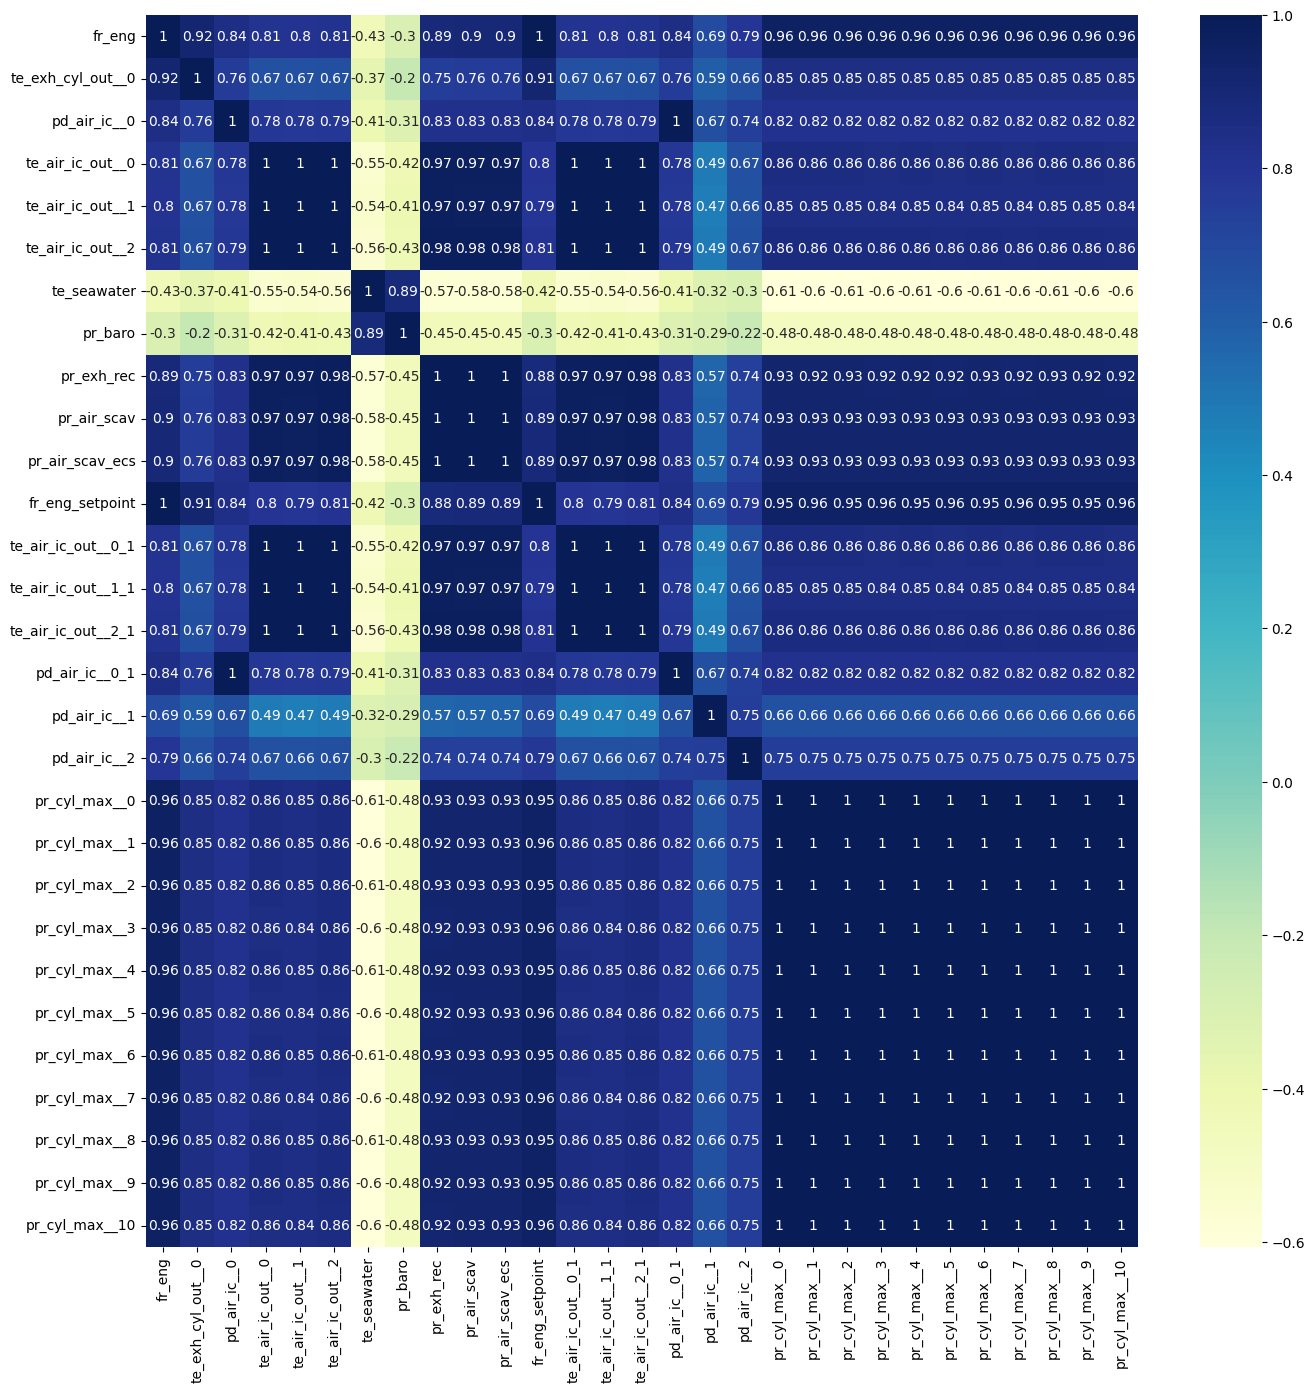

In [21]:
#heatmap creation
numeric_df = df4.select_dtypes(include='number')
#create correlation matrix 
corr_matrix = numeric_df.corr()
plt.figure(figsize=(16, 16))
# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
# Show the plot
plt.show()

In [9]:
#X=df4[["fr_eng","pd_air_ic__0","te_air_ic_out__0","te_seawater","pr_baro","pr_exh_rec","pr_air_scav","pr_air_scav_ecs"]]
#y=df4["te_exh_cyl_out__0"]

# "tea_seawater" & "pr_baro" were added for the initial model attempt, here will be deleted cuz of the low correlation indicated by heatmap
X=df4[["fr_eng","pd_air_ic__0","te_air_ic_out__0","pr_exh_rec","pr_air_scav"]]
y=df4["te_exh_cyl_out__0"]

In [23]:
#Split train and test size with chronological order 8:2
train_size=int(len(df4)*0.8)
X_train,X_test=X.iloc[:train_size],X.iloc[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [24]:
Preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler())]),
         selector(dtype_include='number'))], 
    remainder='drop')

Pipeline1 = Pipeline([ ('preprocessor', Preprocessor), 
                    ('Linear Regression', LinearRegression())])

Pipeline1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5b01fb2b90>)])),
                ('Linear Regression', LinearRegression())])

In [25]:
y_pred=Pipeline1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)

mse: 188.25874456270546
mae: 12.7449175683078
r2: -0.17652822452806283


### Random Forest 

In [26]:
Pipeline2 = Pipeline([('Scaler', StandardScaler()), 
                    ('RandomForest', RandomForestRegressor())])

Pipeline2.fit(X_train,y_train)

y_pred=Pipeline2.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)

mse: 458.60119015003704
mae: 19.626585000000727
r2: -1.8660408060564926


### Gradient Boosting (brings the best performance for single dependent variable)

In [7]:
# Try with a larger dataset 
df3=df3.dropna(subset=["te_exh_cyl_out__0"])
len(df3)

254840

In [12]:
X=df3[["fr_eng","pd_air_ic__0","te_air_ic_out__0","pr_exh_rec","pr_air_scav"]]
y=df3["te_exh_cyl_out__0"]

train_size=int(len(df3)*0.8)
X_train,X_test=X.iloc[:train_size],X.iloc[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
# Fit the model on the available data
model.fit(X_train, y_train)
# Predict the missing values
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("mae:",mae)
print("r2:",r2)

mse: 246.99194081303432
mae: 10.879215919954671
r2: 0.9376486464717586


In [35]:
df4["te_exh_cyl_out__0"].mean()

554.5785428542853

##### Multicollinearity Check 

In [43]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# remove/impute NaN values from df 

In [44]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

            feature           VIF
0            fr_eng  4.666345e+02
1      pd_air_ic__0  8.109078e+01
2  te_air_ic_out__0  5.007973e+04
3       te_seawater  6.011437e+04
4           pr_baro  7.455888e+02
5        pr_exh_rec  1.583534e+04
6       pr_air_scav           inf
7   pr_air_scav_ecs           inf


/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


According to the vif result, all selected X features have high multicollinearity. So pca will be used in the following to achieve dimensionality reduction 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
#Scale data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Fit pca 
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain at least 95% of the variance
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Print the optimal number of components
print(f"Optimal number of components to explain 95% variance: {optimal_components}")

# Transform the data using the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
principal_components = pca_optimal.fit_transform(X_scaled)


Optimal number of components to explain 95% variance: 3


In [16]:
explained_variance = pca_optimal.explained_variance_
explained_variance_ratio = pca_optimal.explained_variance_ratio_
print("Explained Variance:", explained_variance)
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance: [4.16871963 0.50851995 0.21594364]
Explained Variance Ratio: [0.83374065 0.10170359 0.04318856]


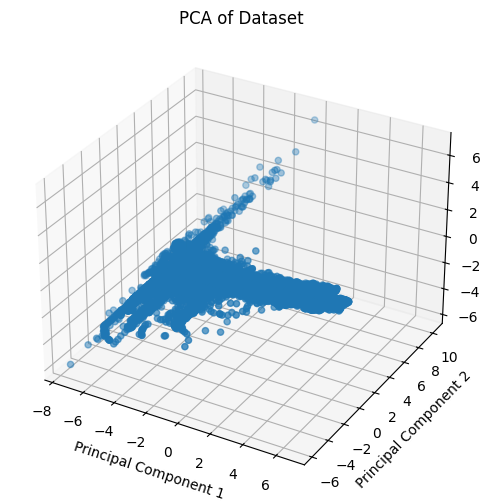

In [21]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])

# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Dataset')
plt.show()

In [23]:
X=df_pca
y=df3["te_exh_cyl_out__0"]

train_size=int(len(X)*0.8)

X_train,X_test=X.iloc[:train_size],X.iloc[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

# Fit the model on the transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1067.582374574212
Mean Absolute Error: 27.800254321371323


In [24]:
r2=r2_score(y_test,y_pred)
print(r2)

0.7304964451937964


In [28]:
#Use pca result to fit gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#R2
r2=r2_score(y_test,y_pred)
print("r2:",r2)

# Print the feature importances
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

Mean Squared Error: 302.92603119908733
r2: 0.9235284843625771
Feature Importances: [0.97932822 0.0062335  0.01443828]


### VAE 

In [11]:
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

In [12]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np

No need to check if the input data is normally distributed 
Input Data: The raw data does not need to follow a Gaussian distribution.
Latent Space: The VAE assumes a Gaussian distribution in the latent space.
Preprocessing: Normalize and preprocess the input data to ensure effective training

In [12]:
df3.columns

Index(['fr_eng', 'te_exh_cyl_out__0', 'pd_air_ic__0', 'te_air_ic_out__0',
       'te_air_ic_out__1', 'te_air_ic_out__2', 'te_seawater', 'pr_baro',
       'pr_exh_rec', 'pr_air_scav', 'pr_air_scav_ecs', 'fr_eng_setpoint',
       'te_air_ic_out__0_1', 'te_air_ic_out__1_1', 'te_air_ic_out__2_1',
       'pd_air_ic__0_1', 'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0',
       'pr_cyl_max__1', 'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4',
       'pr_cyl_max__5', 'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8',
       'pr_cyl_max__9', 'pr_cyl_max__10'],
      dtype='object')

In [18]:
# Check for NaN values in the dataset
np.isnan(scaled_data).any()

True

In [19]:
# Dataset with missing values significantly influence model performance, hence imputer will be used here
np.isnan(df3).any()

time                  False
fr_eng                False
te_exh_cyl_out__0     False
pd_air_ic__0          False
te_air_ic_out__0      False
te_air_ic_out__1      False
te_air_ic_out__2      False
te_seawater           False
pr_baro               False
pr_exh_rec            False
pr_air_scav           False
pr_air_scav_ecs       False
fr_eng_setpoint       False
te_air_ic_out__0_1    False
te_air_ic_out__1_1    False
te_air_ic_out__2_1    False
pd_air_ic__0_1        False
pd_air_ic__1          False
pd_air_ic__2          False
pr_cyl_max__0          True
pr_cyl_max__1          True
pr_cyl_max__2          True
pr_cyl_max__3          True
pr_cyl_max__4          True
pr_cyl_max__5          True
pr_cyl_max__6          True
pr_cyl_max__7          True
pr_cyl_max__8          True
pr_cyl_max__9          True
pr_cyl_max__10         True
dtype: bool

 Defining Imputation Method (100% outside of data distribution bonds)

In [36]:
def impute_nan(data, scale=1.0, use_trend=True, epsilon=1e-9):
    """
    Replace Nan values with random values outside the min/max range of each column and guaranteee 100% out of distribution 
    while leveraging temporal context (neighboring values) to guide directionality

    Args:
       data: Imput Dataframe(time-series, sorted by time)
       scale:Controls how far outside the min/max the imputed values are placed. 
       use_trend: If true, impute direction (above/below) is based on neighboring trends. 

    Returns:
      Data with Nans replaced by values outside the original distribution
    """
    df=data.copy()
 
    for col in df.columns:
        if df[col].isna().sum()==0:
            continue
       
       # min/max of the column
        min_val=df[col].min(skipna=True)
        max_val=df[col].max(skipna=True)
       
       #edge case: all values are identical (min == max)
        if min_val==max_val:
            min_val-=epsilon
            max_val+=epsilon

       #Forward & backward fill to get neighboring values 
        prev_vals=df[col].ffill()
        next_vals=df[col].bfill()
    
       # Iterate over Nan Indices 
        nan_indices=df.index[df[col].isna()]
        for idx in nan_indices:
            #Get neighboring values
            prev=prev_vals.loc[idx]
            next_=next_vals.loc[idx]

            #Determine direction based on temporal context
            if use_trend:
                if pd.isna(prev) and pd.isna(next_):
                    #no temporal neighbors: random direction
                    direction=np.random.choice(['below','above'])
                elif pd.isna(prev):
                    #only next value exists
                    direction='above' if next_>df[col].median() else 'below'
                elif pd.isna(next_):
                    #only previous valye exists 
                    direction='above' if prev>df[col].median() else 'below'
                else:
                    #both neighbors exist: follow trend
                    direction='above' if next_>prev else 'below'
            else:
                direction=np.random.choice(['below','above'])

        #Generate offset strictly >0**
        offset=np.random.uniform(epsilon, scale)
       
       #Impute values 
        if direction == 'below':
            imputed=min_val-offset
        else:
            imputed=max_val+offset

        df.loc[idx,col]=imputed 
       
    return df 

In [42]:
import pandas as pd
import numpy as np

def impute_nan(data, scale=1.0, use_trend=True, epsilon=1e-9):
    """
    Replace NaN values with random values outside the min/max range of each column and guarantee 100% out of distribution
    while leveraging temporal context (neighboring values) to guide directionality

    Args:
       data: Input DataFrame (time-series, sorted by time)
       scale: Controls how far outside the min/max the imputed values are placed.
       use_trend: If true, impute direction (above/below) is based on neighboring trends.

    Returns:
      Data with NaNs replaced by values outside the original distribution
    """
    df = data.copy()

    for col in df.columns:
        if df[col].isna().sum() == 0:
            continue

        # min/max of the column
        min_val = df[col].min(skipna=True)
        max_val = df[col].max(skipna=True)

        # edge case: all values are identical (min == max)
        if min_val == max_val:
            min_val -= epsilon
            max_val += epsilon

        # Forward & backward fill to get neighboring values
        prev_vals = df[col].ffill()
        next_vals = df[col].bfill()

        # Iterate over NaN indices
        nan_indices = df.index[df[col].isna()]
        for idx in nan_indices:
            # Get neighboring values
            prev = prev_vals.loc[idx]
            next_ = next_vals.loc[idx]

            # Determine direction based on temporal context
            if use_trend:
                if pd.isna(prev) and pd.isna(next_):
                    # No temporal neighbors: random direction
                    direction = np.random.choice(['below', 'above'])
                elif pd.isna(prev):
                    # Only next value exists
                    direction = 'above' if next_ > df[col].median() else 'below'
                elif pd.isna(next_):
                    # Only previous value exists
                    direction = 'above' if prev > df[col].median() else 'below'
                else:
                    # Both neighbors exist: follow trend
                    direction = 'above' if next_ > prev else 'below'
            else:
                direction = np.random.choice(['below', 'above'])

            # Generate offset strictly >0
            offset = np.random.uniform(epsilon, scale)

            # Impute values
            if direction == 'below':
                imputed = min_val - offset
            else:
                imputed = max_val + offset

            df.loc[idx, col] = imputed

    return df


In [82]:
df3.columns

Index(['time', 'fr_eng', 'te_exh_cyl_out__0', 'pd_air_ic__0',
       'te_air_ic_out__0', 'te_air_ic_out__1', 'te_air_ic_out__2',
       'te_seawater', 'pr_baro', 'pr_exh_rec', 'pr_air_scav',
       'pr_air_scav_ecs', 'fr_eng_setpoint', 'te_air_ic_out__0_1',
       'te_air_ic_out__1_1', 'te_air_ic_out__2_1', 'pd_air_ic__0_1',
       'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0', 'pr_cyl_max__1',
       'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4', 'pr_cyl_max__5',
       'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8', 'pr_cyl_max__9',
       'pr_cyl_max__10'],
      dtype='object')

So the df3 trained below was the dataset that excluded te_exh_cyl_out with other indexes besides 0, maybe should retrain based on the unfiltered dataset, since there is no y here, hence no datapollution? 

In [ ]:
#Apply Imputation Function to Dataset df3
df_=pd.DataFrame(df3).set_index('time')
df_imputed=impute_nan(dfprep)

In [47]:
print("Original Data:", df3[:100])
print("Imputed Data:", df_imputed[:100])

Original Data:                     time    fr_eng  te_exh_cyl_out__0  pd_air_ic__0  \
7664 2023-10-06 07:47:00  0.197315             319.15         100.0   
7672 2023-10-06 07:55:00  0.453224             321.15          80.0   
7673 2023-10-06 07:56:00  0.445776             329.15         110.0   
7674 2023-10-06 07:57:00  0.447881             339.15         100.0   
7675 2023-10-06 07:58:00  0.448938             348.15          80.0   
...                  ...       ...                ...           ...   
7766 2023-10-06 09:29:00  0.844936             547.15         420.0   
7767 2023-10-06 09:30:00  0.842017             543.15         460.0   
7768 2023-10-06 09:31:00  0.841254             543.15         370.0   
7769 2023-10-06 09:32:00  0.842563             549.15         380.0   
7770 2023-10-06 09:33:00  0.842565             554.15         350.0   

      te_air_ic_out__0  te_air_ic_out__1  te_air_ic_out__2  te_seawater  \
7664            308.95            308.75            310.3

In [ ]:
#this was the code, I fucking delted it by accident, but should use this code anyway 
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_df = df3.select_dtypes(include='number')

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Impute NaN values
data = impute_nan(scaled_df)

# Custom dataset for float data
class FloatDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Ensure integer-based indexing
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Create DataLoader
dataset = FloatDataset(data.values)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# Split the dataset into training and testing sets based on time
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Configuration parameters (This part should be defined in the same cell when running in Jupyter)
class Config:
    batch_size = 128
    epochs = 10
    no_cuda = False
    no_mps = False
    seed = 1
    log_interval = 10

args = Config()
args.cuda = not args.no_cuda and torch.cuda.is_available()
use_mps = not args.no_mps and torch.backends.mps.is_available()

torch.manual_seed(args.seed)

if args.cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# VAE Model
class VAE(nn.Module):
    def __init__(self, input_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, input_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return self.fc4(h3)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim=scaled_data.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device).float()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"NaN or Inf detected in loss at batch {batch_idx}.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data.to(device).float()  # Convert to FloatTensor
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, args.epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 20).to(device)
            sample = model.decode(sample).cpu()
            print(sample)  # Print the generated sample


In [66]:
model

VAE(
  (fc1): Linear(in_features=29, out_features=400, bias=True)
  (fc21): Linear(in_features=400, out_features=20, bias=True)
  (fc22): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=29, bias=True)
)

In [69]:
## Impute missing values using vae model on the samedataframe (smaller dataframe?)
# Function to impute NaN values using VAE model
def impute_with_vae(model, data, device, epsilon=1e-9):
    model.eval()
    imputed_data = data.copy()
    input_dim = data.shape[1]  # Ensure input dimension matches model's expectation

    with torch.no_grad():
        for i, row in imputed_data.iterrows():
            if row.isna().any():
                known_values = row.dropna()
                nan_columns = row.index[row.isna()]

                # Prepare the input data with known values
                input_data = np.zeros((1, input_dim))
                input_data[0, ~row.isna()] = known_values.values  # Fill known values

                input_data = torch.tensor(input_data, dtype=torch.float32).to(device)

                mu, logvar = model.encode(input_data)
                z = model.reparameterize(mu, logvar)
                recon_row = model.decode(z).cpu().numpy().flatten()

                for col in nan_columns:
                    imputed_data.at[i, col] = recon_row[data.columns.get_loc(col)]
    
    return imputed_data

imputed_df = impute_with_vae(model, scaled_df, device)
imputed_df_original_scale = pd.DataFrame(scaler.inverse_transform(imputed_df), columns=numeric_df.columns)
print("\nImputed DataFrame (original scale):")
print(imputed_df_original_scale)


Imputed DataFrame (original scale):
          fr_eng  te_exh_cyl_out__0  pd_air_ic__0  te_air_ic_out__0  \
0       0.197315             319.15         100.0            308.95   
1       0.453224             321.15          80.0            311.15   
2       0.445776             329.15         110.0            310.25   
3       0.447881             339.15         100.0            309.45   
4       0.448938             348.15          80.0            309.15   
...          ...                ...           ...               ...   
254835  1.026240             555.15         210.0            310.65   
254836  1.035701             555.15          70.0            310.75   
254837  1.028137             555.15         180.0            310.75   
254838  1.027765             555.15         230.0            310.75   
254839  1.021612             555.15         280.0            310.75   

        te_air_ic_out__1  te_air_ic_out__2  te_seawater       pr_baro  \
0                 308.75            3

In [76]:
#pre save imputed dataset for further comparison and further analysis (the df with previous nan columns was the one 
#that dropped te_exh_cyl_out with indexes except 0 one )
path = "/home/ec2-user/SageMaker/sensor-imputation-thesis/src/sensor_imputation_thesis/nadire/datavaeimputed" 
imputed_df_original_scale.to_csv(path, index=False)

In [80]:
df3

,time,fr_eng,te_exh_cyl_out__0,pd_air_ic__0,te_air_ic_out__0,te_air_ic_out__1,te_air_ic_out__2,te_seawater,pr_baro,pr_exh_rec,pr_air_scav,pr_air_scav_ecs,fr_eng_setpoint,te_air_ic_out__0_1,te_air_ic_out__1_1,te_air_ic_out__2_1,pd_air_ic__0_1,pd_air_ic__1,pd_air_ic__2,pr_cyl_max__0,pr_cyl_max__1,pr_cyl_max__2,pr_cyl_max__3,pr_cyl_max__4,pr_cyl_max__5,pr_cyl_max__6,pr_cyl_max__7,pr_cyl_max__8,pr_cyl_max__9,pr_cyl_max__10
7664,2023-10-06 07:47:00,0.197315,319.15,100.0,308.95,308.75,310.35,290.85,2.313907e+06,3000.0,5975.341797,5975.341797,0.000000,308.95,308.75,310.35,100.0,170.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7672,2023-10-06 07:55:00,0.453224,321.15,80.0,311.15,310.45,312.35,290.85,2.324246e+06,4000.0,7179.260254,7179.260254,0.408359,311.15,310.45,312.35,80.0,130.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7673,2023-10-06 07:56:00,0.445776,329.15,110.0,310.25,310.25,311.35,290.85,2.304314e+06,5000.0,7896.423340,7896.423340,0.448318,310.25,310.25,311.35,110.0,160.0,300.0,8.030530e+06,8.097224e+06,8.122487e+06,8.006244e+06,8.160239e+06,7.902987e+06,8.152176e+06,8.072427e+06,7.953017e+06,8.045766e+06,7.865630e+06
7674,2023-10-06 07:57:00,0.447881,339.15,100.0,309.45,309.75,310.35,290.85,2.303419e+06,5000.0,7946.777344,7946.777344,0.448318,309.45,309.75,310.35,100.0,160.0,300.0,7.994625e+06,8.002830e+06,8.124139e+06,7.874634e+06,8.088998e+06,7.997701e+06,8.042045e+06,7.967694e+06,7.953571e+06,7.935997e+06,7.949359e+06
7675,2023-10-06 07:58:00,0.448938,348.15,80.0,309.15,309.45,309.85,290.85,2.308788e+06,5000.0,7965.087891,7965.087891,0.448318,309.15,309.45,309.85,80.0,150.0,280.0,7.956510e+06,7.827528e+06,7.890958e+06,7.991956e+06,7.907330e+06,7.926048e+06,7.893451e+06,8.024173e+06,7.891364e+06,7.878486e+06,7.849812e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439181,2024-07-31 23:55:00,1.026240,555.15,210.0,310.65,310.95,311.75,291.55,2.576810e+06,127000.0,141625.976562,141625.976562,1.019965,310.65,310.95,311.75,210.0,280.0,800.0,1.856252e+07,1.854191e+07,1.849418e+07,1.871668e+07,1.851638e+07,1.854142e+07,1.859081e+07,1.858032e+07,1.853391e+07,1.857475e+07,1.836696e+07
439182,2024-07-31 23:56:00,1.035701,555.15,70.0,310.75,310.95,311.75,291.45,2.589659e+06,124000.0,140539.550781,140539.550781,1.019965,310.75,310.95,311.75,70.0,50.0,850.0,1.843547e+07,1.849375e+07,1.839342e+07,1.843972e+07,1.849008e+07,1.847004e+07,1.844222e+07,1.847805e+07,1.847364e+07,1.848599e+07,1.818777e+07
439183,2024-07-31 23:57:00,1.028137,555.15,180.0,310.75,310.95,311.75,291.45,2.583247e+06,123000.0,136929.321289,136929.321289,1.019965,310.75,310.95,311.75,180.0,160.0,760.0,1.834930e+07,1.841229e+07,1.834910e+07,1.839466e+07,1.845610e+07,1.843628e+07,1.844858e+07,1.845886e+07,1.833319e+07,1.842986e+07,1.822104e+07
439184,2024-07-31 23:58:00,1.027765,555.15,230.0,310.75,311.15,311.75,291.45,2.582651e+06,119000.0,133502.197266,133502.197266,1.019965,310.75,311.15,311.75,230.0,230.0,780.0,1.819353e+07,1.827441e+07,1.828138e+07,1.825701e+07,1.826648e+07,1.827018e+07,1.820674e+07,1.827462e+07,1.825356e+07,1.835797e+07,1.800422e+07


#### Create Plot to compare imputed and original values 


In [ ]:
import matplotlib.pyplot as plt

# Compare summary statistics
def compare_statistics(original, imputed, columns):
    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        print(f"Statistics for {col}:")
        print(f"Original: mean = {orig_col.mean()}, std = {orig_col.std()}")
        print(f"Imputed: mean = {imputed_col.mean()}, std = {imputed_col.std()}")
        print()

# Density Plots
def plot_density(original, imputed, columns):
    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        
        plt.figure(figsize=(8, 6))
        sns.kdeplot(orig_col, shade=True, label='Original')
        sns.kdeplot(imputed_col, shade=True, label='Imputed')
        plt.title(f'Density Plot of {col}')
        plt.legend()
        plt.show()

# Apply comparison and plotting
compare_statistics(df3, imputed_df_original_scale, numeric_df.columns)
plot_density(df3, imputed_df_original_scale, numeric_df.columns)


In [59]:
dfo= pd.DataFrame(df3)

In [73]:
for col in dfo.columns:
    print(f"Column {col} has {dfo[col].isna().sum()} NaN values")

Column time has 0 NaN values
Column fr_eng has 0 NaN values
Column te_exh_cyl_out__0 has 0 NaN values
Column pd_air_ic__0 has 0 NaN values
Column te_air_ic_out__0 has 0 NaN values
Column te_air_ic_out__1 has 0 NaN values
Column te_air_ic_out__2 has 0 NaN values
Column te_seawater has 0 NaN values
Column pr_baro has 0 NaN values
Column pr_exh_rec has 0 NaN values
Column pr_air_scav has 0 NaN values
Column pr_air_scav_ecs has 0 NaN values
Column fr_eng_setpoint has 0 NaN values
Column te_air_ic_out__0_1 has 0 NaN values
Column te_air_ic_out__1_1 has 0 NaN values
Column te_air_ic_out__2_1 has 0 NaN values
Column pd_air_ic__0_1 has 0 NaN values
Column pd_air_ic__1 has 0 NaN values
Column pd_air_ic__2 has 0 NaN values
Column pr_cyl_max__0 has 437 NaN values
Column pr_cyl_max__1 has 437 NaN values
Column pr_cyl_max__2 has 437 NaN values
Column pr_cyl_max__3 has 437 NaN values
Column pr_cyl_max__4 has 437 NaN values
Column pr_cyl_max__5 has 437 NaN values
Column pr_cyl_max__6 has 437 NaN valu

In [72]:
# Iterate over each column and print the count of NaN values
for col in scaled_df.columns:
    print(f"Column {col} has {scaled_df[col].isna().sum()} NaN values")


Column fr_eng has 0 NaN values
Column te_exh_cyl_out__0 has 0 NaN values
Column pd_air_ic__0 has 0 NaN values
Column te_air_ic_out__0 has 0 NaN values
Column te_air_ic_out__1 has 0 NaN values
Column te_air_ic_out__2 has 0 NaN values
Column te_seawater has 0 NaN values
Column pr_baro has 0 NaN values
Column pr_exh_rec has 0 NaN values
Column pr_air_scav has 0 NaN values
Column pr_air_scav_ecs has 0 NaN values
Column fr_eng_setpoint has 0 NaN values
Column te_air_ic_out__0_1 has 0 NaN values
Column te_air_ic_out__1_1 has 0 NaN values
Column te_air_ic_out__2_1 has 0 NaN values
Column pd_air_ic__0_1 has 0 NaN values
Column pd_air_ic__1 has 0 NaN values
Column pd_air_ic__2 has 0 NaN values
Column pr_cyl_max__0 has 437 NaN values
Column pr_cyl_max__1 has 437 NaN values
Column pr_cyl_max__2 has 437 NaN values
Column pr_cyl_max__3 has 437 NaN values
Column pr_cyl_max__4 has 437 NaN values
Column pr_cyl_max__5 has 437 NaN values
Column pr_cyl_max__6 has 437 NaN values
Column pr_cyl_max__7 has 4

#### Quantifying SFOC Score 

KL Divergence can be different in the vae models (from article): 
According to the code/example above, kl function= 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2);

And the other function can be: kl=0.5*sum(mu^2+sigma^2-log(sigma^2)-1) [From https://www.bilibili.com/video/BV1pw411e7xD?spm_id_from=333.788.player.switch&vd_source=798cc4956351084101fda6e1ff3adc08]





NOTE: Relu activation function ignores sequence order and treat time steps as independent, making it unsuitable for tasks requiring time-aware model(forecasting). Instead, RNN/CNN perform better as encoder. 

In [41]:
#Define several encoder for comparison
class LSTMEncoder(nn.Module):
        def _init_(self,input_dim,hidden_dim,latent_dim,num_layers=1):
            super()._init_()
            self.lstm=nn.LSTM(input_dim,hidden_dim,num_layers,batch_first=True)
            self.fc_mu=nn.linear(hidden_dim,latent_dim)
            self.fc_logvar=nn.Linear(hidden_dim,latent_dim)

        def forward(self, x):
             _,(h,n,_)=self.lstm(x)
             h_n=h_n[-1]
             mu=self.fc_mu(h_n)
             log_var=self.fc_logvar(h_n)
             return mu,log_var
      
class GRUEncoder(nn.Module):
        def _init_(self,input_dim,hidden_dim,latent_dim,num_layers=1):
            super()._init_()
            self.gru=nn.GRU(input_dim,hidden_dim,num_layers,batch_first=True)
            self.fc_mu=nn.linear(hidden_dim,latent_dim)
            self.fc_logvar=nn.Linear(hidden_dim,latent_dim)

        def forward(self, x):
             _,(h,n,_)=self.gru(x)
             h_n=h_n[-1]
             mu=self.fc_mu(h_n)
             log_var=self.fc_logvar(h_n)
             return mu,log_var
     
class CNNEncoder(nn.Module):
        def _init_(self,input_dim,hidden_dim,latent_dim):
            super()._init_()
            self.conv1=nn.Conv1d(input_dim,16,kernel_size=3,padding=1) #input shape: (batch,input_dim,seq_len)
            self.conv2=nn.Conv1d(16,32,kerner_size=3,padding=1)
            self.fc_mu=nn.linear(32*seq_len,latent_dim)
            self.fc_logvar=nn.Linear(32*seq_len,latent_dim)

        def forward(self, x):
             x=x.permute(0,2,1) # (batch,seq_len,input_dim) to (batch,seq_len,input_dim)
             x=self.relu(self.conv1(x))
             x=self.relu(self.conv2(x))
             x=x.flatten(1) #flatten all except batch dimension
             mu=self.fc_mu(h_n)
             log_var=self.fc_logvar(h_n)
             return mu,log_var

In [ ]:
# LSTM encoder & LSTM decoder 
class LSTMEncoder(nn.Module):
        def _init_(self,input_dim,hidden_dim,latent_dim,num_layers=1):
            super()._init_()
            self.lstm=nn.LSTM(input_dim,hidden_dim,num_layers,batch_first=True)
            self.fc_mu=nn.linear(hidden_dim,latent_dim)
            self.fc_logvar=nn.Linear(hidden_dim,latent_dim)

        def forward(self, x):
             _,(h,n,_)=self.lstm(x)
             h_n=h_n[-1]
             mu=self.fc_mu(h_n)
             log_var=self.fc_logvar(h_n)
             return mu,log_var

class LSTMDecoder(nn.Module):
      def _init_(self,latent_dim,hidden_dim,output_dim,num_layers=1):
            super()._init_()
            self.hidden_dim=hidden_dim
            self.num_layers=num_layers
            self.fc=nn.Linear(latent_dim,hidden_dim*num_layers)
            self.lstm=nn.LSTM(output_dim,hidden_dim,num_layers,batch_first=True)
            self.fc_output=nn.Linear(hidden_dim,output_dim)

      def forward(self,z,seq_len,batch_size):
            h_0=self.fc(z).view(self.num_layers,batch_size,self.hidden_dim)
            c_0=torch.zeros_like(h_0)
            input=torch.zeros(batch_size,1,self.fc_out.out_features,device=z.device)
            outputs=[]
            for _ in range(seq_len):
                  out, (h_0,c_0)=self.lstm(input,(h_0,c_0))
                  out=self.fc_out(out.squeeze(1))
                  outputs.append(out)